# 

In [754]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")


In [3]:
df  = pd.read_csv("fraud_oracle.csv")

In [5]:
df.shape

(15420, 33)

In [15]:
df.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
df.dtypes[df.dtypes=="object"].index

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [11]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [21]:
df["WeekOfMonth"].isnull().sum()


0

In [26]:
df["WeekOfMonth"].min()

1

In [24]:
df["WeekOfMonth"].max()

5

In [28]:
df["WeekOfMonth"].skew ()

0.1154264340181797

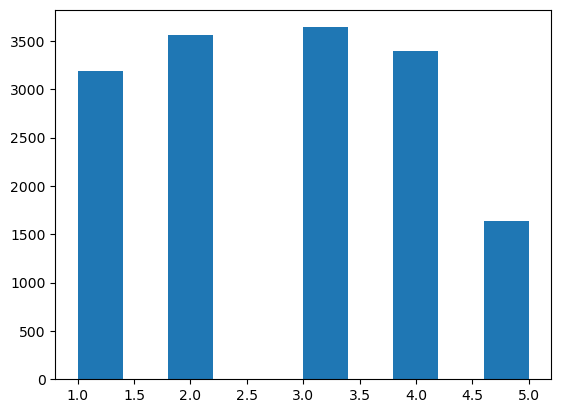

In [30]:
plt.hist(df["WeekOfMonth"])
plt.show()

In [32]:
df["WeekOfMonthClaimed"].isnull().sum()

0

In [34]:
df["WeekOfMonthClaimed"].min()

1

In [36]:
df["WeekOfMonthClaimed"].max()

5

In [38]:
df["WeekOfMonthClaimed"].skew()

0.1582330657649077

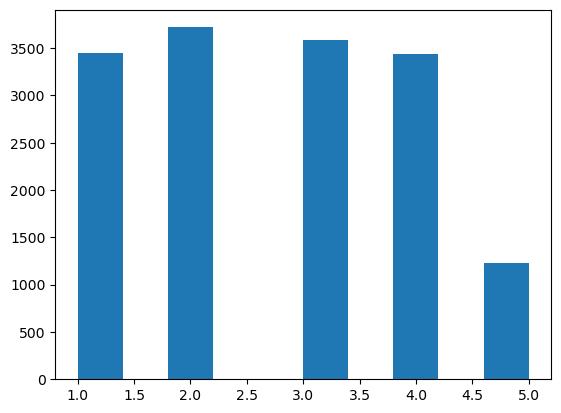

In [40]:
plt.hist(df["WeekOfMonthClaimed"])
plt.show()

In [42]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [44]:
df["Age"].isnull().sum()

0

In [48]:
df["Age"].min()

0

In [46]:
df["Age"].max()

80

In [50]:
df[df["Age"]==80]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
347,Mar,3,Friday,Chevrolet,Rural,Wednesday,Mar,4,Male,Married,...,more than 7,over 65,No,No,External,more than 5,no change,1 vehicle,1994,All Perils
421,Dec,1,Thursday,Chevrolet,Urban,Thursday,Apr,4,Male,Married,...,more than 7,over 65,No,No,External,none,no change,1 vehicle,1994,Collision
534,Feb,2,Sunday,Pontiac,Urban,Monday,Feb,2,Male,Married,...,more than 7,over 65,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils
567,Oct,1,Sunday,Toyota,Urban,Tuesday,Oct,4,Male,Married,...,more than 7,over 65,No,No,External,more than 5,4 to 8 years,2 vehicles,1994,All Perils
1721,May,3,Monday,Toyota,Urban,Thursday,May,3,Female,Single,...,7 years,over 65,No,No,External,more than 5,no change,1 vehicle,1994,All Perils
2837,Jun,1,Wednesday,Saab,Urban,Thursday,Jun,4,Female,Married,...,6 years,over 65,No,No,External,more than 5,no change,1 vehicle,1994,Liability
3310,May,4,Thursday,Honda,Urban,Friday,May,4,Male,Married,...,7 years,over 65,No,No,External,none,no change,1 vehicle,1994,Collision
3471,Feb,3,Monday,Toyota,Rural,Friday,Feb,3,Male,Married,...,7 years,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils
3739,Aug,3,Tuesday,Pontiac,Urban,Wednesday,Aug,4,Male,Married,...,more than 7,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils
3828,Oct,3,Tuesday,Toyota,Urban,Thursday,Oct,3,Male,Married,...,7 years,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils


In [52]:
df["Age"].skew()

0.15231404727082648

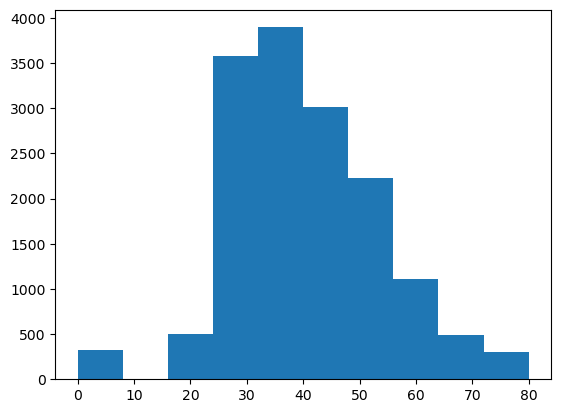

In [54]:
plt.hist(df["Age"])
plt.show()

In [57]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [58]:
df["FraudFound_P"].isnull().sum()

0

In [8]:
df["FraudFound_P"].min()

0

In [10]:
df["FraudFound_P"].max()

1

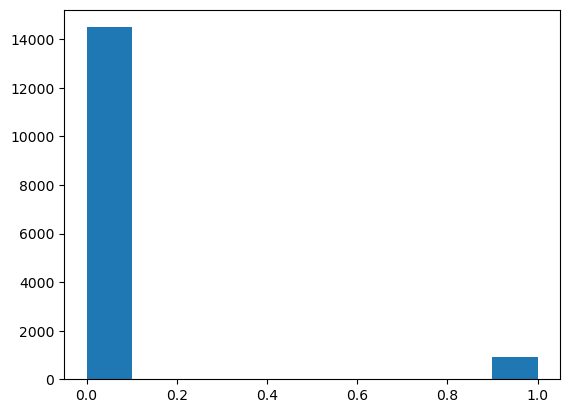

In [12]:
plt.hist(df["FraudFound_P"])
plt.show()

In [14]:
df["PolicyNumber"].isnull().sum()

0

In [ ]:
df["PolicyNumber"].min()

In [ ]:
df["PolicyNumber"].min()

In [ ]:
df["PolicyNumber"].skew()

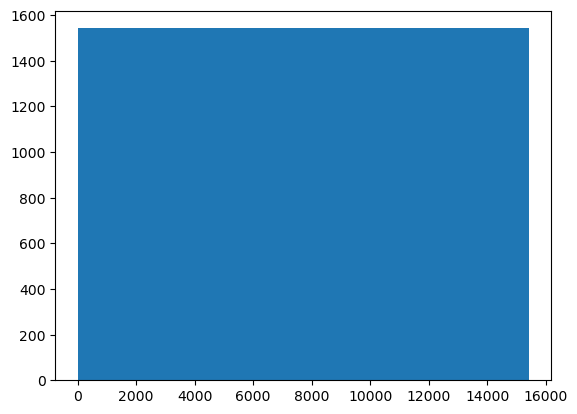

In [16]:
plt.hist(df["PolicyNumber"])
plt.show()

In [18]:
df["RepNumber"].isnull().sum()

0

In [ ]:
df["RepNumber"].min()

In [ ]:
df["RepNumber"].max()

In [20]:
df["RepNumber"].skew()

0.00662809823160281

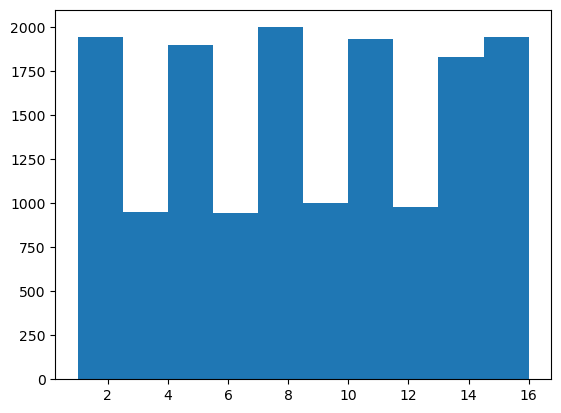

In [26]:
plt.hist(df["RepNumber"])
plt.show()

In [29]:
df["Deductible"].isnull().sum()

0

In [31]:
df["Deductible"].min()

300

In [33]:
df["Deductible"].max()

700

In [35]:
df["Deductible"].skew()

6.078803225603099

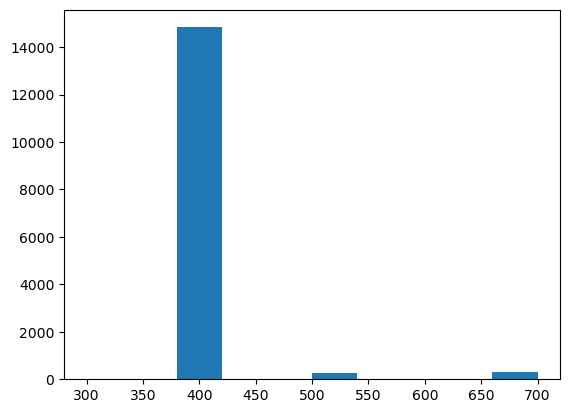

In [37]:
plt.hist(df["Deductible"])
plt.show()

In [38]:
df["DriverRating"].isnull().sum()

0

In [41]:
df["DriverRating"].min()

1

In [43]:
df["DriverRating"].max()

4

In [45]:
df["DriverRating"].skew()

0.009282982957731558

In [47]:
df["Year"].isnull().sum()

0

In [49]:
df["Year"].min()

1994

In [51]:
df["Year"].max()

1996

In [53]:
df["Year"].skew()

0.2456893854654165

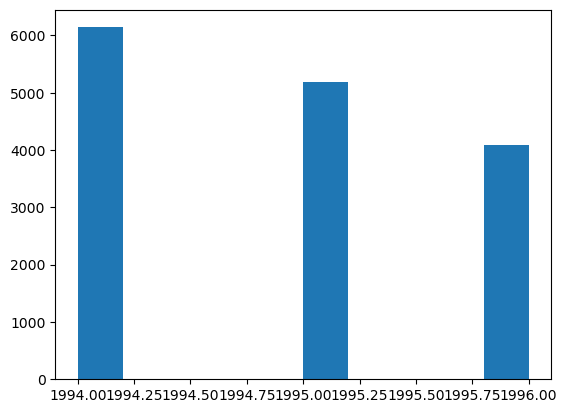

In [55]:
plt.hist(df["Year"])
plt.show()

#### categorical  Variable  

In [60]:
df.dtypes[df.dtypes=="object"].index

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [64]:
df.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision


####  B. Categorical  Variable  Analysis  

In [226]:
df.dtypes[df.dtypes=="object"].index

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [230]:
df["Month"].isnull().sum()

0

In [232]:
df["Month"].value_counts()

Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: count, dtype: int64

In [674]:
df["Month"].mode()

0    Jan
Name: Month, dtype: object

In [676]:
df["Month"].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [678]:
df["Month"].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

<Axes: xlabel='Month'>

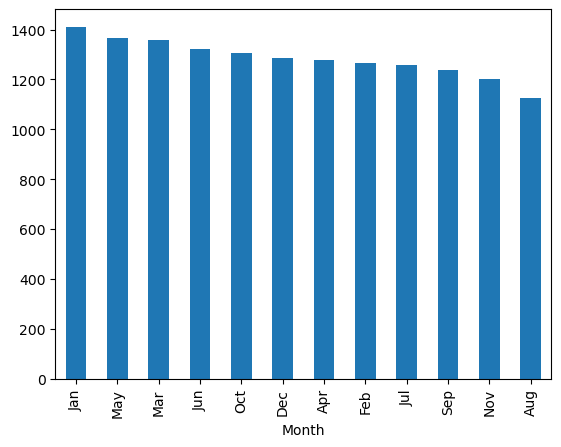

In [680]:
df["Month"].value_counts().plot(kind="bar")

In [682]:
df["DayOfWeek"].value_counts()

DayOfWeek
Weekday    11693
Weekend     3727
Name: count, dtype: int64

In [684]:
df["DayOfWeek"].mode()

0    Weekday
Name: DayOfWeek, dtype: object

In [686]:
df["DayOfWeek"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [248]:
df["DayOfWeek"].nunique()

7

In [628]:
df["DayOfWeek"]=  df["DayOfWeek"].replace(["Monday","Tuesday","Wednesday","Thursday","Friday"],"Weekday")
df["DayOfWeek"]=  df["DayOfWeek"].replace(["Saturday","Sunday"],"Weekend")

<Axes: xlabel='DayOfWeek'>

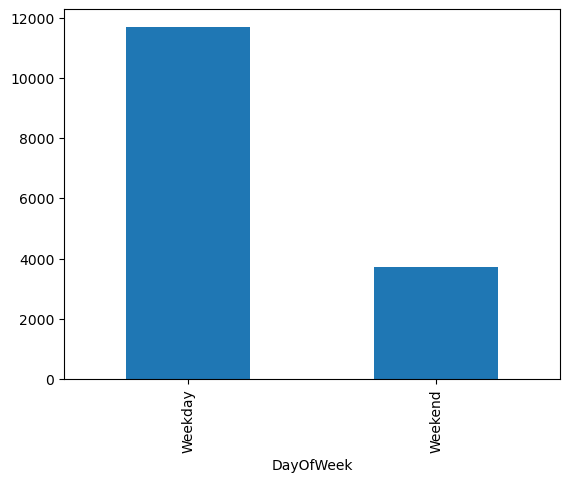

In [630]:
df["DayOfWeek"].value_counts().plot(kind="bar")

In [251]:
df["Make"].value_counts()

Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64

In [252]:
df["Make"].mode()

0    Pontiac
Name: Make, dtype: object

In [253]:
df["Make"].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [254]:
df["Make"].nunique()

19

<Axes: xlabel='Make'>

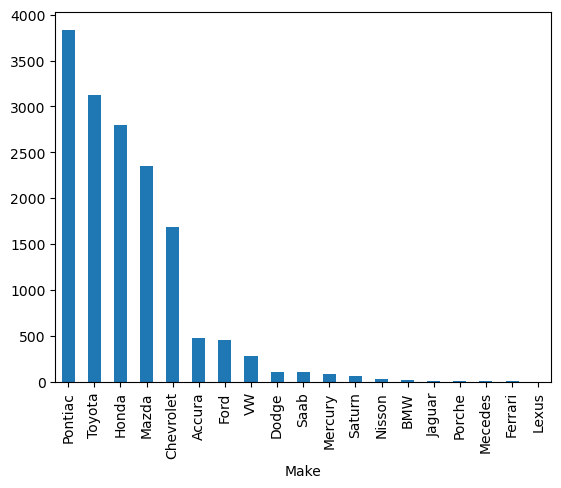

In [255]:
df["Make"].value_counts().plot(kind="bar")

In [257]:
df["AccidentArea"].value_counts()

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

In [258]:
df["AccidentArea"].mode()

0    Urban
Name: AccidentArea, dtype: object

In [259]:
df["AccidentArea"].unique()

array(['Urban', 'Rural'], dtype=object)

In [260]:
df["AccidentArea"].nunique()

2

<Axes: xlabel='AccidentArea'>

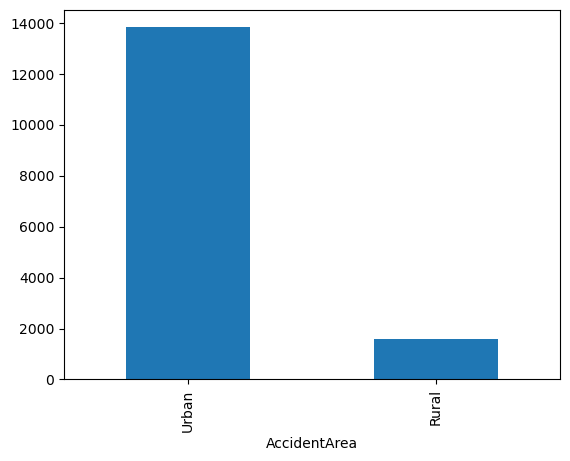

In [271]:
df["AccidentArea"].value_counts().plot(kind="bar")

In [272]:
df["DayOfWeekClaimed"].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [634]:
df["DayOfWeekClaimed"]=  df["DayOfWeekClaimed"].replace(["Monday","Tuesday","Wednesday","Thursday","Friday"],"Weekday_claim")
df["DayOfWeekClaimed"]=  df["DayOfWeekClaimed"].replace(["Saturday","Sunday"],"Weekend_claim")

In [275]:
df["DayOfWeekClaimed"].mode()

0    Monday
Name: DayOfWeekClaimed, dtype: object

In [276]:
df["DayOfWeekClaimed"].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', '0'], dtype=object)

In [279]:
df["DayOfWeekClaimed"].nunique()

8

<Axes: xlabel='DayOfWeekClaimed'>

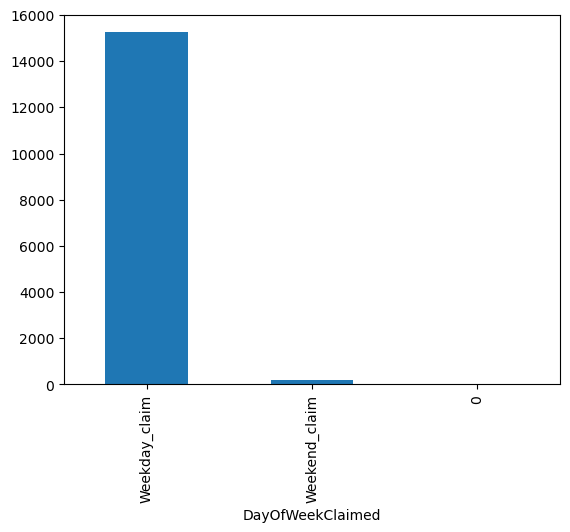

In [636]:
df["DayOfWeekClaimed"].value_counts().plot(kind="bar")

In [282]:
df["MonthClaimed"].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [285]:
df["MonthClaimed"].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [286]:
df["MonthClaimed"].nunique()

13

In [287]:
df["MonthClaimed"].mode()

0    Jan
Name: MonthClaimed, dtype: object

<Axes: xlabel='MonthClaimed'>

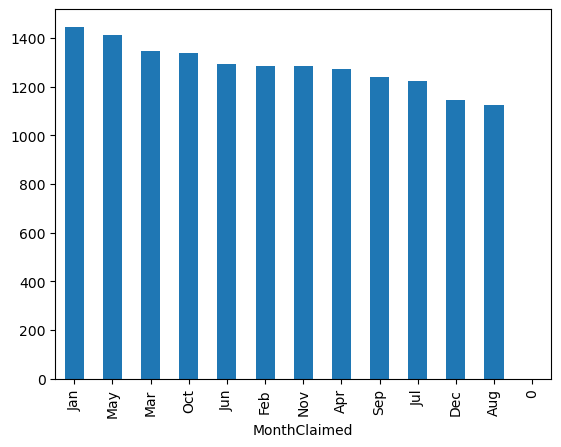

In [288]:
df["MonthClaimed"].value_counts().plot(kind="bar")

In [289]:
df["Sex"].value_counts()

Sex
Male      13000
Female     2420
Name: count, dtype: int64

In [290]:
df["Sex"].mode()

0    Male
Name: Sex, dtype: object

In [291]:
df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [292]:
df["Sex"].nunique()

2

<Axes: xlabel='Sex'>

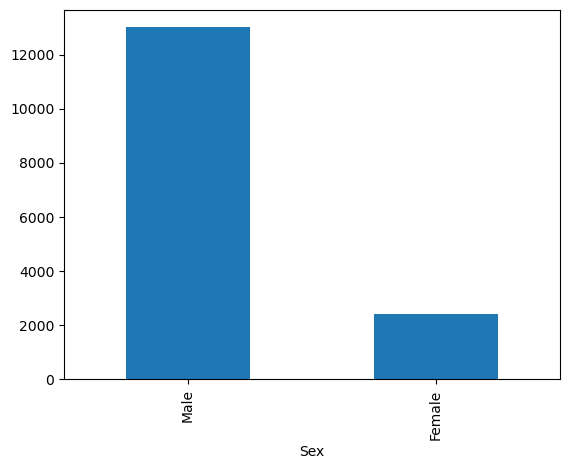

In [293]:
df["Sex"].value_counts().plot(kind="bar")

In [294]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64

In [295]:
df["MaritalStatus"].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [639]:
df["MaritalStatus"] =  df["MaritalStatus"].replace(["Married","Divorced","Widow"],"Married")
df["MaritalStatus"] =  df["MaritalStatus"].replace(["Single"],"Unmarried")

In [296]:
df["MaritalStatus"].nunique()

4

In [297]:
df["MaritalStatus"].mode()

0    Married
Name: MaritalStatus, dtype: object

<Axes: xlabel='MaritalStatus'>

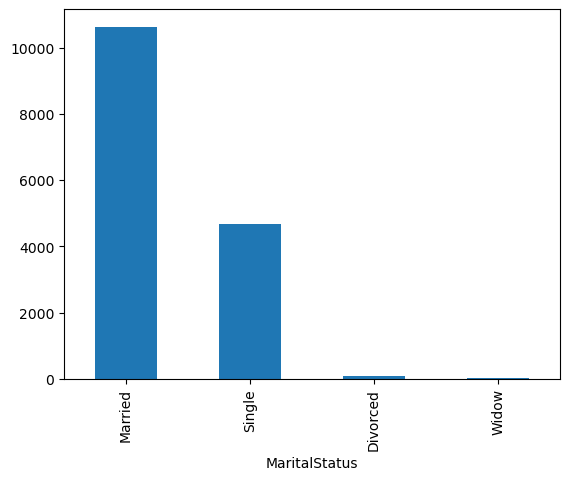

In [298]:
df["MaritalStatus"].value_counts().plot(kind="bar")

In [688]:
df["Fault"].value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

In [301]:
df["Fault"].mode()

0    Policy Holder
Name: Fault, dtype: object

In [302]:
df["Fault"].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [303]:
df["Fault"].nunique()

2

<Axes: xlabel='Fault'>

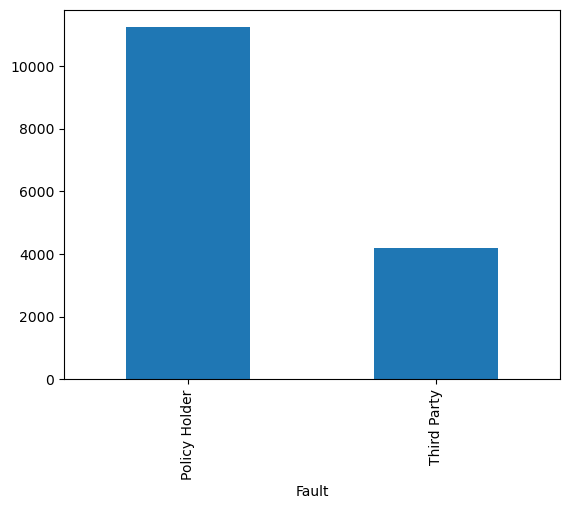

In [304]:
df["Fault"].value_counts().plot(kind="bar")

In [690]:
df["PolicyType"].value_counts()

PolicyType
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: count, dtype: int64

In [306]:
df["PolicyType"].mode()

0    Sedan - Collision
Name: PolicyType, dtype: object

In [307]:
df["PolicyType"].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [308]:
df["PolicyType"].nunique()

9

<Axes: xlabel='PolicyType'>

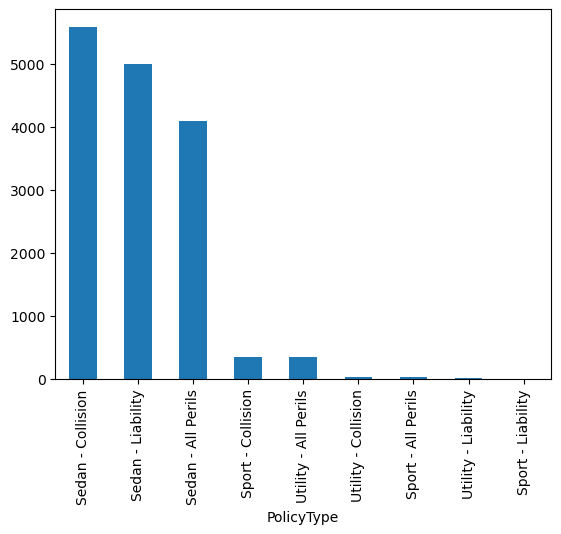

In [309]:
df["PolicyType"].value_counts().plot(kind="bar")

In [310]:
df["VehicleCategory"].value_counts()

VehicleCategory
Sedan      9671
Sport      5358
Utility     391
Name: count, dtype: int64

In [646]:
df["VehicleCategory"] =  df["VehicleCategory"].replace(["Sedan","Sport"],"Passenger")
df["VehicleCategory"] =  df["VehicleCategory"].replace(["Utility"],"Utility")

In [311]:
df["VehicleCategory"].unique()

array(['Sport', 'Utility', 'Sedan'], dtype=object)

In [312]:
df["VehicleCategory"].nunique()

3

In [340]:
df["VehicleCategory"].mode()

0    Sedan
Name: VehicleCategory, dtype: object

<Axes: xlabel='VehicleCategory'>

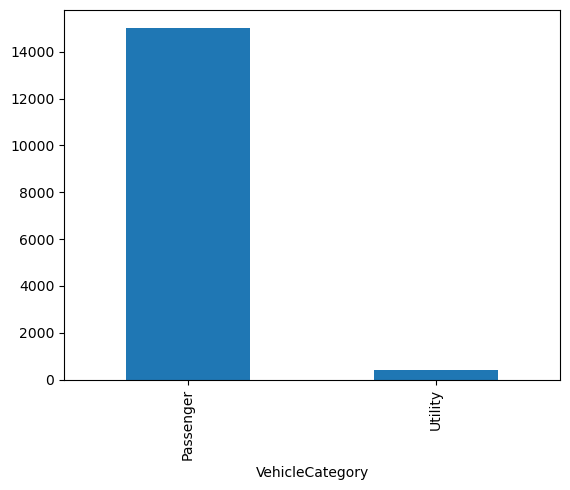

In [648]:
df["VehicleCategory"].value_counts().plot(kind="bar")

In [692]:
df["VehiclePrice"].value_counts()

VehiclePrice
20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: count, dtype: int64

In [345]:
df["VehiclePrice"].mode()

0    20000 to 29000
Name: VehiclePrice, dtype: object

In [348]:
df["VehiclePrice"].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [350]:
df["VehiclePrice"].nunique()

6

<Axes: xlabel='VehiclePrice'>

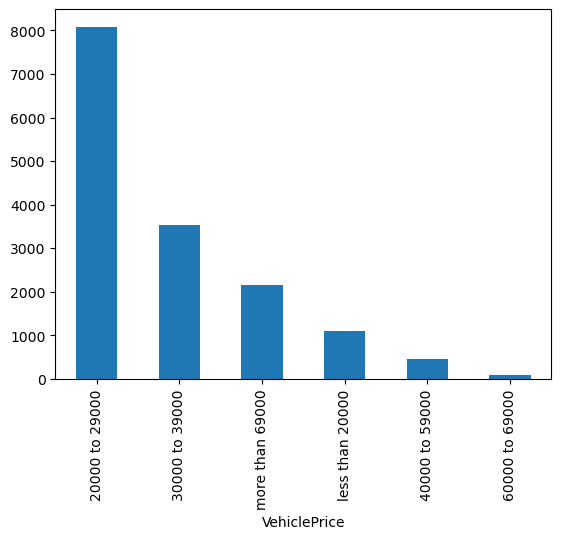

In [352]:
df["VehiclePrice"].value_counts().plot(kind="bar")

In [356]:
df["Days_Policy_Accident"].mode()

0    more than 30
Name: Days_Policy_Accident, dtype: object

In [358]:
df["Days_Policy_Accident"].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [360]:
df["Days_Policy_Accident"].nunique()

5

<Axes: xlabel='Days_Policy_Accident'>

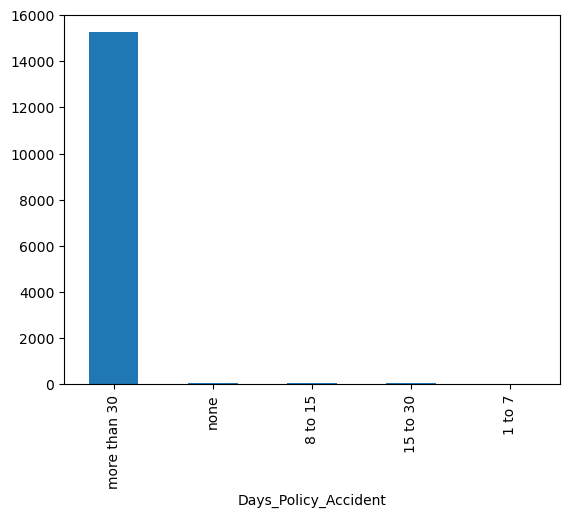

In [702]:
df["Days_Policy_Accident"].value_counts().plot(kind="bar")

In [698]:
df["Days_Policy_Claim"].value_counts()

Days_Policy_Claim
Long Duration    15342
Sort Duration       78
Name: count, dtype: int64

In [696]:
df["Days_Policy_Claim"] =  df["Days_Policy_Claim"].replace(["more than 30"],"Long Duration")
df["Days_Policy_Claim"] =  df["Days_Policy_Claim"].replace(["15 to 30","8 to 15","none"],"Sort Duration")

In [364]:
df["Days_Policy_Claim"].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [367]:
df["Days_Policy_Claim"].nunique()

4

In [369]:
df["Days_Policy_Claim"].mode()

0    more than 30
Name: Days_Policy_Claim, dtype: object

<Axes: xlabel='Days_Policy_Claim'>

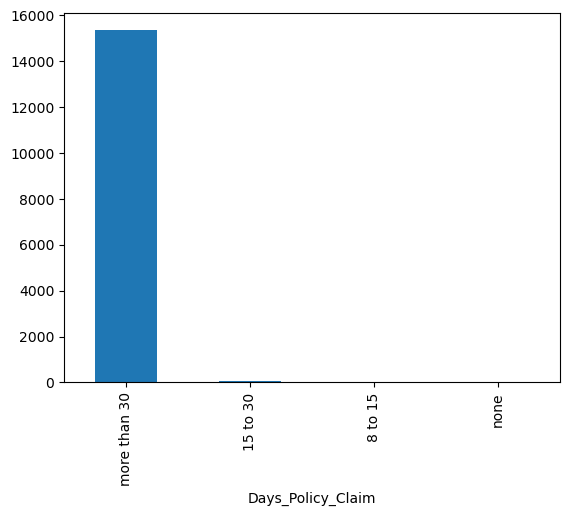

In [371]:
df["Days_Policy_Claim"].value_counts().plot(kind="bar")

In [373]:
df["PastNumberOfClaims"].value_counts()

PastNumberOfClaims
2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: count, dtype: int64

In [652]:
df["PastNumberOfClaims"] =  df["PastNumberOfClaims"].replace(["2 to 4","more than 4","1"],"Claim")
df["PastNumberOfClaims"] =  df["PastNumberOfClaims"].replace(["none"],"No Claim")

In [374]:
df["PastNumberOfClaims"].mode()

0    2 to 4
Name: PastNumberOfClaims, dtype: object

In [376]:
df["PastNumberOfClaims"].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [379]:
df["PastNumberOfClaims"].nunique()

4

<Axes: xlabel='PastNumberOfClaims'>

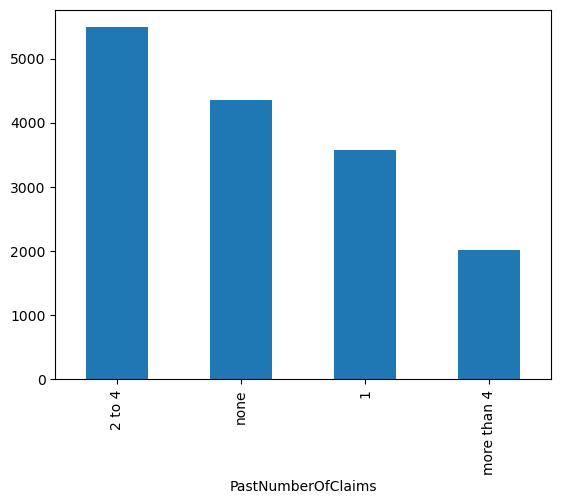

In [380]:
df["PastNumberOfClaims"].value_counts().plot(kind="bar")

In [704]:
df["AgeOfVehicle"].value_counts()

AgeOfVehicle
7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: count, dtype: int64

In [383]:
df["AgeOfVehicle"].mode()

0    7 years
Name: AgeOfVehicle, dtype: object

In [384]:
df["AgeOfVehicle"].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [386]:
df["AgeOfVehicle"].nunique()

8

<Axes: xlabel='AgeOfVehicle'>

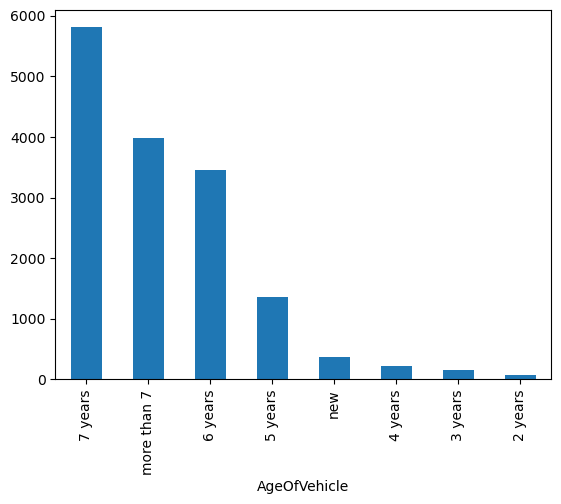

In [391]:
df["AgeOfVehicle"].value_counts().plot(kind="bar")

In [710]:
df["AgeOfPolicyHolder"].mode()

0    Old
Name: AgeOfPolicyHolder, dtype: object

In [716]:
df["AgeOfPolicyHolder"].value_counts()

AgeOfPolicyHolder
Old      14364
Young     1056
Name: count, dtype: int64

In [714]:
df["AgeOfPolicyHolder"] = df["AgeOfPolicyHolder"].replace(["16 to 17","18 to 20","21 to 25","26 to 30"],"Young")
df["AgeOfPolicyHolder"] = df["AgeOfPolicyHolder"].replace(["31 to 35","36 to 40","41 to 50","51 to 65","over 65"],"Old")

In [397]:
df["AgeOfPolicyHolder"].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [400]:
df["AgeOfPolicyHolder"].nunique()

9

<Axes: xlabel='AgeOfPolicyHolder'>

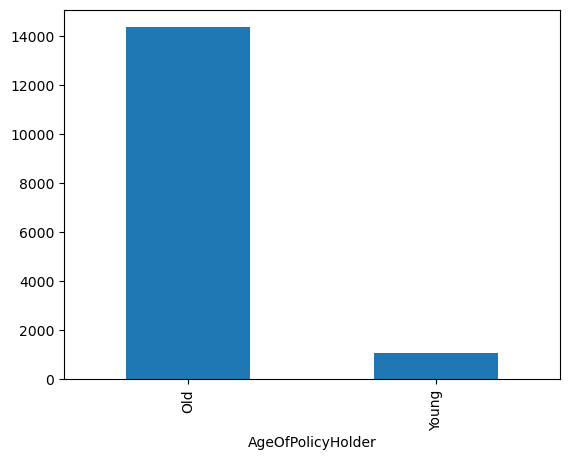

In [718]:
df["AgeOfPolicyHolder"].value_counts().plot(kind="bar")

In [403]:
df["PoliceReportFiled"].isnull().sum()

0

In [406]:
df["PoliceReportFiled"].value_counts()

PoliceReportFiled
No     14992
Yes      428
Name: count, dtype: int64

In [408]:
df["PoliceReportFiled"].mode()

0    No
Name: PoliceReportFiled, dtype: object

In [410]:
df["PoliceReportFiled"].unique()

array(['No', 'Yes'], dtype=object)

In [412]:
df["PoliceReportFiled"].nunique()

2

<Axes: xlabel='PoliceReportFiled'>

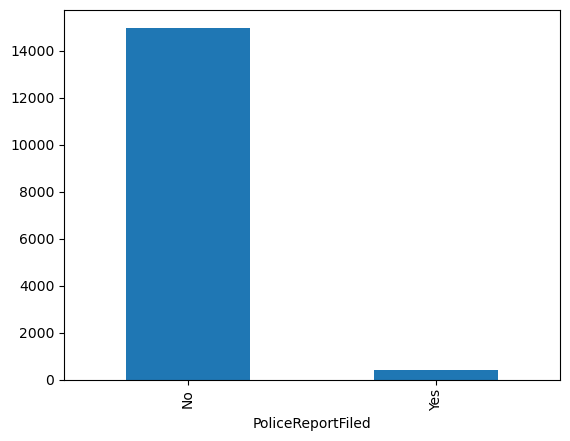

In [414]:
df["PoliceReportFiled"].value_counts().plot(kind="bar")

In [415]:
df["WitnessPresent"].value_counts()

WitnessPresent
No     15333
Yes       87
Name: count, dtype: int64

In [418]:
df["WitnessPresent"].mode()

0    No
Name: WitnessPresent, dtype: object

In [420]:
df["WitnessPresent"].unique()

array(['No', 'Yes'], dtype=object)

In [422]:
df["WitnessPresent"].nunique()

2

<Axes: xlabel='WitnessPresent'>

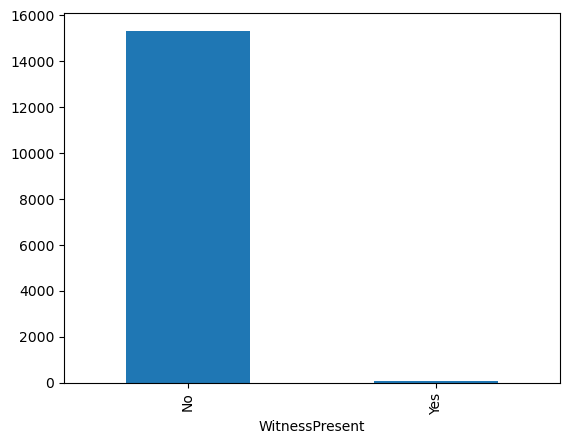

In [424]:
df["WitnessPresent"].value_counts().plot(kind="bar")

In [425]:
df["AgentType"].value_counts()

AgentType
External    15179
Internal      241
Name: count, dtype: int64

In [427]:
df["AgentType"].mode()

0    External
Name: AgentType, dtype: object

In [430]:
df["AgentType"].unique()

array(['External', 'Internal'], dtype=object)

In [432]:
df["AgentType"].nunique()

2

<Axes: xlabel='AgentType'>

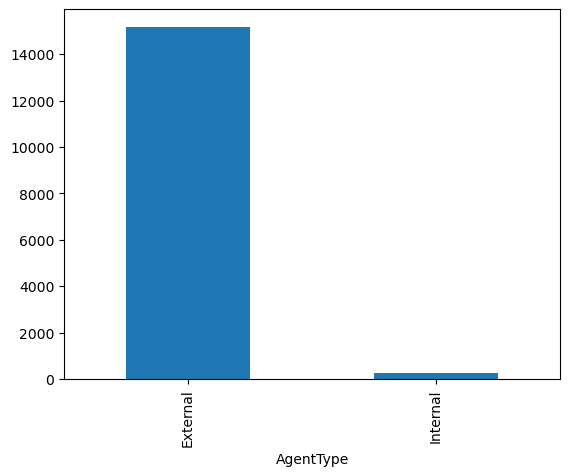

In [434]:
df["AgentType"].value_counts().plot(kind="bar")

In [720]:
df["NumberOfSuppliments"].value_counts()

NumberOfSuppliments
Suppliments       8373
No suppliments    7047
Name: count, dtype: int64

In [654]:
df["NumberOfSuppliments"] =  df["NumberOfSuppliments"].replace(["more than 5","1 to 2","3 to 5"],"Suppliments")
df["NumberOfSuppliments"] =  df["NumberOfSuppliments"].replace(["none"],"No suppliments")

In [437]:
df["NumberOfSuppliments"].mode()

0    none
Name: NumberOfSuppliments, dtype: object

In [440]:
df["NumberOfSuppliments"].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [442]:
df["NumberOfSuppliments"].nunique()

4

<Axes: xlabel='NumberOfSuppliments'>

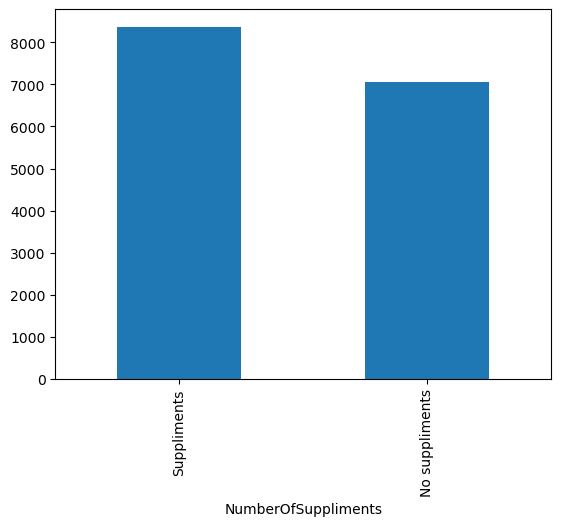

In [726]:
df["NumberOfSuppliments"].value_counts().plot(kind="bar")

In [445]:
df["AddressChange_Claim"].value_counts()

AddressChange_Claim
no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: count, dtype: int64

In [656]:
df["AddressChange_Claim"] =  df["AddressChange_Claim"].replace(["4 to 8 years","2 to 3 years","1 year","under 6 months"],"Change")
df["AddressChange_Claim"] =  df["AddressChange_Claim"].replace(["no change "],"no change ")

In [448]:
df["AddressChange_Claim"].mode()

0    no change
Name: AddressChange_Claim, dtype: object

In [450]:
df["AddressChange_Claim"].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [451]:
df["AddressChange_Claim"].nunique()

5

<Axes: xlabel='AddressChange_Claim'>

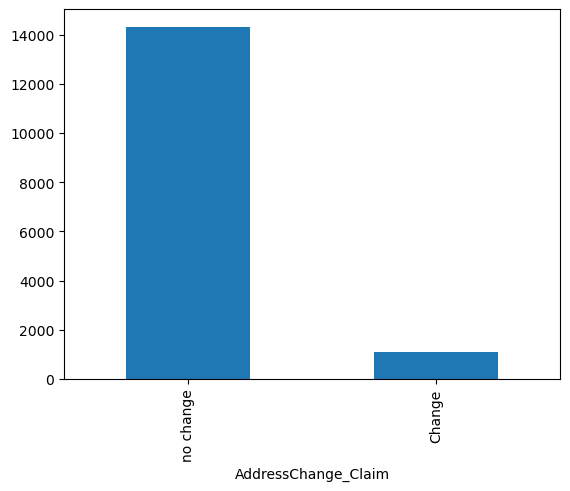

In [728]:
df["AddressChange_Claim"].value_counts().plot(kind="bar")

In [453]:
df["NumberOfCars"].value_counts()

NumberOfCars
1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: count, dtype: int64

In [454]:
df["NumberOfCars"].mode()

0    1 vehicle
Name: NumberOfCars, dtype: object

In [658]:
df["NumberOfCars"] = df["NumberOfCars"].replace(["1 vehicle","2 vehicles","3 to 4","5 to 8","more than 8"], "Multipal Vehicles")
df["NumberOfCars"] = df["NumberOfCars"].replace(["1 vehicle"], "Single Vehicles")

In [460]:
df["NumberOfCars"].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [462]:
df["NumberOfCars"].nunique()

5

<Axes: xlabel='NumberOfCars'>

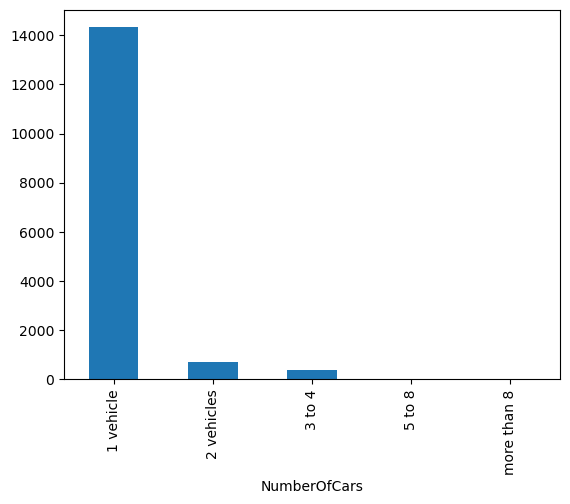

In [464]:
df["NumberOfCars"].value_counts().plot(kind="bar")

In [466]:
df["BasePolicy"].value_counts()

BasePolicy
Collision     5962
Liability     5009
All Perils    4449
Name: count, dtype: int64

In [660]:
df["BasePolicy"] =  df["BasePolicy"].replace(["Liability"],"Liability")
df["BasePolicy"] =  df["BasePolicy"].replace(["Collision","All Perils"],"Non Liability")

In [468]:
df["BasePolicy"].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [470]:
df["BasePolicy"].nunique()

3

In [472]:
df["BasePolicy"].mode()

0    Collision
Name: BasePolicy, dtype: object

<Axes: xlabel='BasePolicy'>

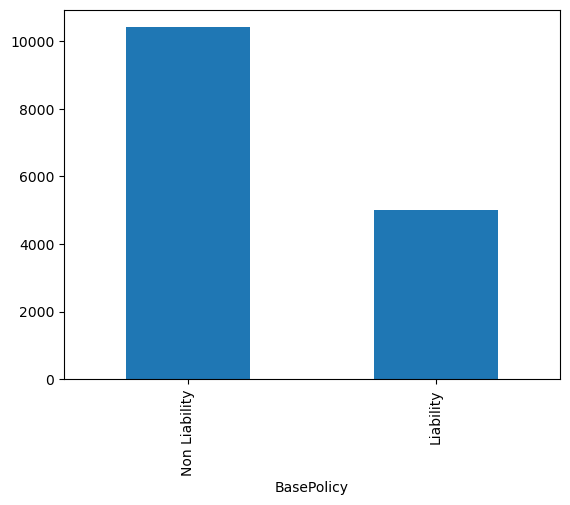

In [662]:
df["BasePolicy"].value_counts().plot(kind="bar")

#### Bivariate Analysis

In [ ]:
#  num to  num

In [493]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [485]:
df.head(1)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability


In [491]:
df[df["FraudFound_P"]==1]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,...,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,Nov,3,Friday,Mazda,Urban,Sunday,Nov,3,Female,Married,...,7 years,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15412,Nov,4,Tuesday,Pontiac,Urban,Wednesday,Nov,4,Female,Single,...,5 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Liability
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


<Axes: xlabel='FraudFound_P', ylabel='WeekOfMonth'>

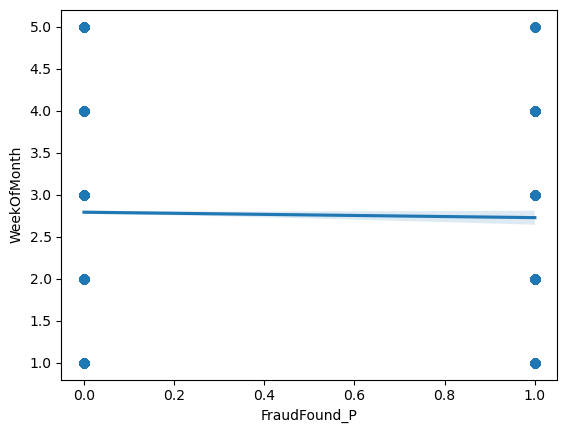

In [511]:
sns.regplot(data=df,x=df["FraudFound_P"], y =df["WeekOfMonth"])

In [503]:
df[["WeekOfMonth","FraudFound_P"]].corr()

,WeekOfMonth,FraudFound_P
WeekOfMonth,1.000000,-0.011861
FraudFound_P,-0.011861,1.000000


<Axes: xlabel='WeekOfMonthClaimed', ylabel='FraudFound_P'>

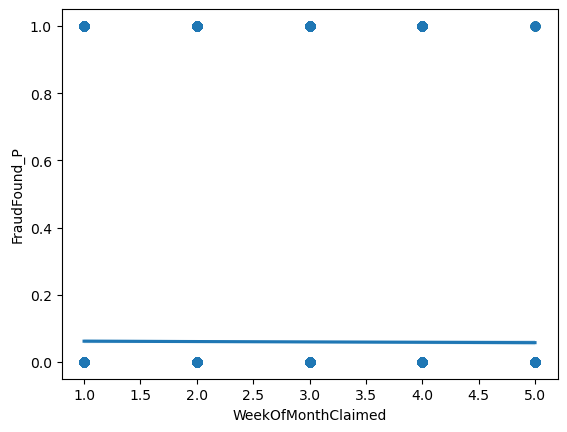

In [527]:
sns.regplot(data=df,x=df["WeekOfMonthClaimed"], y =df["FraudFound_P"])

In [529]:
df[["WeekOfMonthClaimed","FraudFound_P"]].corr()

,WeekOfMonthClaimed,FraudFound_P
WeekOfMonthClaimed,1.000000,-0.005761
FraudFound_P,-0.005761,1.000000


<Axes: xlabel='WeekOfMonthClaimed', ylabel='FraudFound_P'>

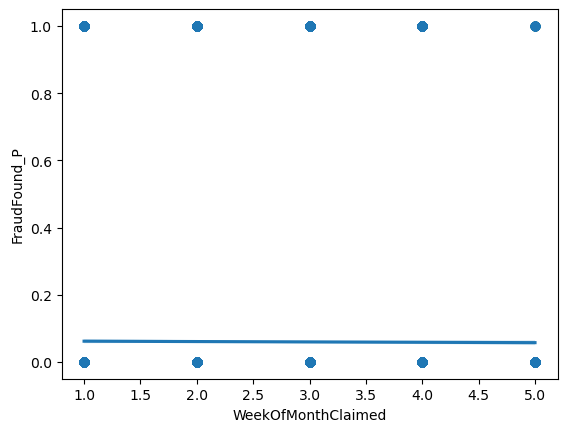

In [531]:
sns.regplot(data=df,x=df["WeekOfMonthClaimed"], y =df["FraudFound_P"])

In [533]:
df[["Age","FraudFound_P"]].corr()

,Age,FraudFound_P
Age,1.000000,-0.029741
FraudFound_P,-0.029741,1.000000


<Axes: xlabel='PolicyNumber', ylabel='FraudFound_P'>

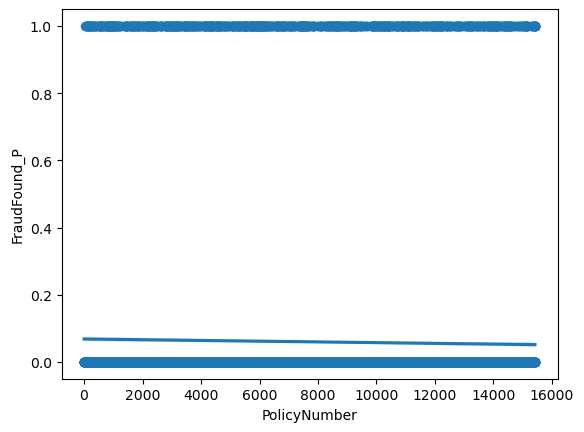

In [535]:
sns.regplot(data=df,x=df["PolicyNumber"], y =df["FraudFound_P"])

In [536]:
df[["PolicyNumber","FraudFound_P"]].corr()

,PolicyNumber,FraudFound_P
PolicyNumber,1.000000,-0.020345
FraudFound_P,-0.020345,1.000000


<Axes: xlabel='RepNumber', ylabel='FraudFound_P'>

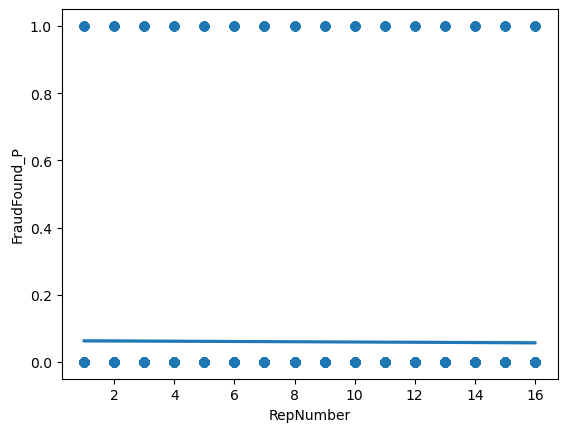

In [539]:
sns.regplot(data=df,x=df["RepNumber"], y =df["FraudFound_P"])

In [541]:
df[["RepNumber","FraudFound_P"]].corr()

,RepNumber,FraudFound_P
RepNumber,1.000000,-0.007551
FraudFound_P,-0.007551,1.000000


<Axes: xlabel='Deductible', ylabel='FraudFound_P'>

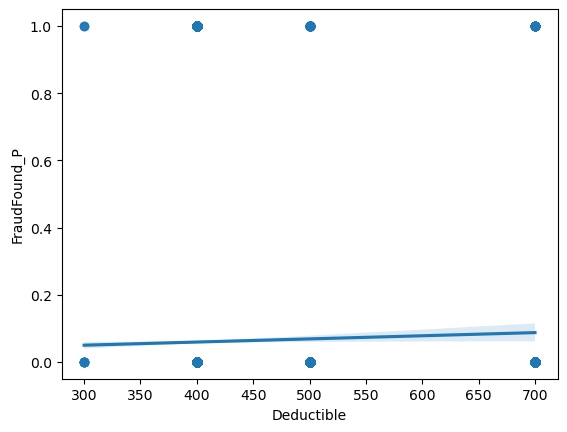

In [543]:
sns.regplot(data=df,x=df["Deductible"], y =df["FraudFound_P"])

In [544]:
df[["Deductible","FraudFound_P"]].corr()

,Deductible,FraudFound_P
Deductible,1.000000,0.017348
FraudFound_P,0.017348,1.000000


<Axes: xlabel='DriverRating', ylabel='FraudFound_P'>

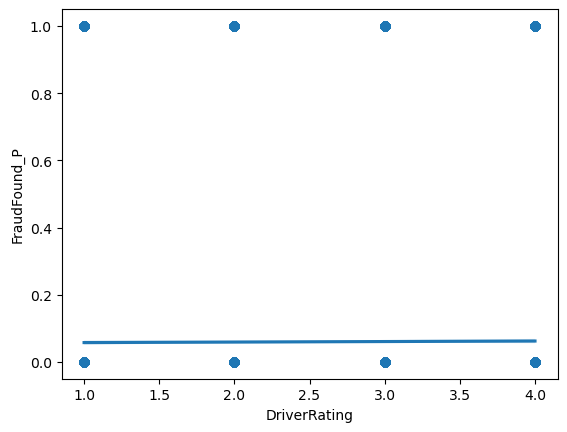

In [547]:
sns.regplot(data=df,x=df["DriverRating"], y =df["FraudFound_P"])

In [548]:
df[["DriverRating","FraudFound_P"]].corr()

,DriverRating,FraudFound_P
DriverRating,1.000000,0.007266
FraudFound_P,0.007266,1.000000


<Axes: xlabel='Year', ylabel='FraudFound_P'>

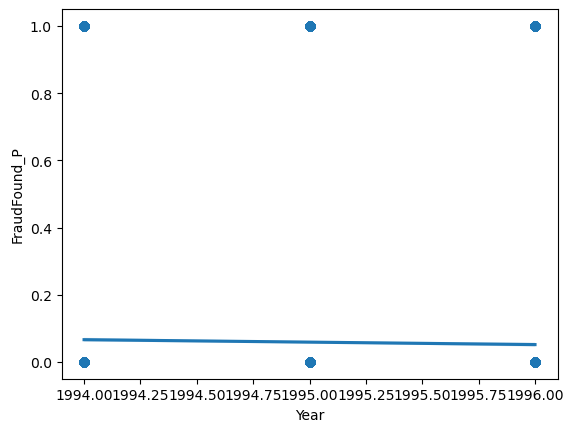

In [551]:
sns.regplot(data=df,x=df["Year"], y =df["FraudFound_P"])

In [559]:
df[["Year","FraudFound_P"]].corr()

,Year,FraudFound_P
Year,1.00000,-0.02476
FraudFound_P,-0.02476,1.00000


In [565]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64

In [567]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [557]:
df.dtypes[df.dtypes=="object"].index

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [ ]:
###  CAT  TO NUM   ANALYSIS 

In [569]:
df.groupby(["MaritalStatus"]).agg({"Age":["min","max","count",]})

Age           
              min max  count
MaritalStatus               
Divorced       26  70     76
Married        18  80  10625
Single          0  80   4684
Widow          21  69     35

In [571]:
df.groupby(["PolicyType"]).agg({"Age":["min","max","count"]})

Age          
                     min max count
PolicyType                        
Sedan - All Perils     0  80  4087
Sedan - Collision      0  80  5584
Sedan - Liability      0  80  4987
Sport - All Perils     0  78    22
Sport - Collision      0  80   348
Sport - Liability     21  21     1
Utility - All Perils   0  80   340
Utility - Collision   26  80    30
Utility - Liability    0  77    21

In [574]:
df["AccidentArea"].value_counts()

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

In [576]:
ub=df[df["AccidentArea"]=="Urban"]
ru=df[df["AccidentArea"]!="Urban"]

In [578]:
from scipy.stats import  ttest_ind

In [585]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [587]:
fraud=  df[df["FraudFound_P"]==0]
non_fraud=  df[df["FraudFound_P"]!=0]

In [605]:
#stats.ttest_ind(fraud["FraudFound_P"], non_fraud["FraudFound_P"])

In [599]:
# # Feature Engineering :-It is the process of creating new features or trasnforming existing 
# # features to improve the performance of a machine learning model
# 1. Feature creation
# 2. Feature transformation 
#     1. rescaling -> transform each variable into the scale - MinMax Scaler, standardization, normaization
#     2. Encoding -> transform categorical variable into numerical variable- dummy creation, One- hot coding, lable encoder etc..
#     3. Transformation using maths operations - log, square root 
# 3. Feature Extraction 
#     a. Dimension reduction - PCA
#     b. Feature combine 
#     etc...
# 4. Missing value treatment 
# 5. Outlier Treatment 
# etc....


#### Outliear_Treatment 

In [625]:
df.dtypes[df.dtypes!="object"].index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [609]:
num_data   = df[['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']]

In [615]:
num_data.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,3.0,4.00,5.0,5.00,5.00,5.00,5.00,5.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,3.0,4.00,4.0,5.00,5.00,5.00,5.00,5.00,5.0
Age,15420.0,39.855707,13.492377,0.0,0.00,0.00,21.00,22.00,23.00,26.0,31.00,38.0,48.00,58.0,64.00,65.00,67.00,71.00,76.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,155.19,309.38,463.57,617.76,771.95,1542.9,3855.75,7710.5,11565.25,13878.1,14649.05,14803.24,14957.43,15111.62,15265.81,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,1.00,1.00,1.00,1.00,1.00,2.0,5.00,8.0,12.00,15.0,16.00,16.00,16.00,16.00,16.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.00,400.00,400.00,400.00,400.0,400.00,400.0,400.00,400.0,400.00,400.00,500.00,700.00,700.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,2.0,3.00,4.0,4.00,4.00,4.00,4.00,4.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1994.00,1994.00,1994.00,1994.00,1994.0,1994.00,1995.0,1996.00,1996.0,1996.00,1996.00,1996.00,1996.00,1996.00,1996.0


In [621]:
def outlier_cap_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [623]:
num_data1= num_data.apply(outlier_cap_percentile)

In [664]:
df.dtypes[df.dtypes=="object"] .index

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [666]:
df.dtypes[df.dtypes!="object"] .index

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [668]:
ob_data  = df[['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy']]

##### check  missing values 

In [672]:
df.isnull().sum()
# we Have check  missing value they don't have  missing in  my model we don't  need  treat it 

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [730]:
master_data  = pd.concat([num_data1 , ob_data ],axis=1)

In [742]:
master_data.shape

(15420, 26)

In [740]:
df.shape

(15420, 33)

In [738]:
master_data =df.drop(columns=["MonthClaimed","Month","Make","PolicyType","VehiclePrice","Days_Policy_Accident","AgeOfVehicle"],axis=1)

In [750]:
final_data = pd.get_dummies(data=master_data,columns=["DayOfWeek","AccidentArea","DayOfWeekClaimed","Sex","MaritalStatus","Fault",
                                         "VehicleCategory","Days_Policy_Claim","PastNumberOfClaims","AgeOfPolicyHolder",
                                         "PoliceReportFiled","WitnessPresent","AgentType","NumberOfSuppliments","AddressChange_Claim",
                                         "NumberOfCars","BasePolicy"],drop_first=True, dtype="int")

In [752]:
final_data

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,DayOfWeek_Weekend,AccidentArea_Urban,...,VehicleCategory_Utility,Days_Policy_Claim_Sort Duration,PastNumberOfClaims_No Claim,AgeOfPolicyHolder_Young,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_Suppliments,AddressChange_Claim_no change,BasePolicy_Non Liability
0,5,1,21,0,1,12,300,1,0,1,...,0,0,1,1,0,0,0,0,0,0
1,3,4,34,0,2,15,400,4,0,1,...,0,0,1,0,1,0,0,0,1,1
2,5,2,47,0,3,7,400,3,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2,1,65,0,4,4,400,2,1,0,...,0,0,0,0,1,0,0,1,1,0
4,5,2,27,0,5,3,400,1,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,0,1,...,0,0,0,0,0,0,0,0,1,1
15416,5,1,30,0,15417,11,400,3,0,1,...,0,0,0,0,0,0,0,1,1,0
15417,5,1,24,1,15418,4,400,4,0,0,...,0,0,0,1,0,0,0,1,1,1
15418,1,2,34,0,15419,6,400,4,0,1,...,0,0,1,0,0,0,0,1,1,1


In [748]:
 master_data= master_data.drop(columns=["Year"],axis=1)

In [760]:
final_data[final_data["FraudFound_P"]==0]

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,DayOfWeek_Weekend,AccidentArea_Urban,...,VehicleCategory_Utility,Days_Policy_Claim_Sort Duration,PastNumberOfClaims_No Claim,AgeOfPolicyHolder_Young,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_Suppliments,AddressChange_Claim_no change,BasePolicy_Non Liability
0,5,1,21,0,1,12,300,1,0,1,...,0,0,1,1,0,0,0,0,0,0
1,3,4,34,0,2,15,400,4,0,1,...,0,0,1,0,1,0,0,0,1,1
2,5,2,47,0,3,7,400,3,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2,1,65,0,4,4,400,2,1,0,...,0,0,0,0,1,0,0,1,1,0
4,5,2,27,0,5,3,400,1,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,4,5,42,0,15412,1,400,1,0,0,...,0,0,0,0,0,0,0,0,1,1
15413,4,4,40,0,15414,9,400,2,0,1,...,0,0,0,0,1,0,0,1,1,0
15414,4,4,58,0,15415,3,400,4,0,1,...,0,0,1,0,0,0,0,1,0,1
15416,5,1,30,0,15417,11,400,3,0,1,...,0,0,0,0,0,0,0,1,1,0


In [764]:
#FraudFound_P
 

In [778]:
y = final_data["FraudFound_P"]
x =final_data.drop(["FraudFound_P"],axis=1)

In [780]:
x_train,x_test,y_train,y_test=  train_test_split(x,y,test_size=0.2,random_state=0)

std = StandardScaler()
std.fit(x_train )



StandardScaler()

In [796]:
x_train1 =  pd.DataFrame(std.transform(x_train),columns=x_train.columns)
x_test1 =   pd.DataFrame(std.transform(x_test),columns=x_test.columns)

x_train1

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,DayOfWeek_Weekend,AccidentArea_Urban,DayOfWeekClaimed_Weekday_claim,...,VehicleCategory_Utility,Days_Policy_Claim_Sort Duration,PastNumberOfClaims_No Claim,AgeOfPolicyHolder_Young,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_Suppliments,AddressChange_Claim_no change,BasePolicy_Non Liability
0,0.937266,1.829458,0.753971,-1.500430,0.324656,-0.173514,-1.325351,-0.564244,0.341441,0.10906,...,-0.164235,-0.073341,1.588256,-0.27375,-0.170631,-0.077155,-0.12237,0.912979,-3.564641,0.693478
1,-1.384910,0.243332,-0.946324,0.251420,0.758846,-0.173514,0.461971,-0.564244,0.341441,0.10906,...,-0.164235,-0.073341,-0.629621,-0.27375,-0.170631,-0.077155,-0.12237,0.912979,0.280533,0.693478
2,0.163207,0.243332,-0.207066,-0.121830,-0.760817,-0.173514,1.355632,-0.564244,0.341441,0.10906,...,-0.164235,-0.073341,1.588256,-0.27375,-0.170631,-0.077155,-0.12237,0.912979,0.280533,0.693478
3,0.937266,1.036395,1.123600,-0.670713,1.410129,-0.173514,-1.325351,1.772283,0.341441,0.10906,...,-0.164235,13.634848,-0.629621,-0.27375,-0.170631,-0.077155,-0.12237,-1.095315,0.280533,-1.442006
4,-0.610851,-0.549731,-0.428843,-0.823467,1.193035,-0.173514,-1.325351,1.772283,0.341441,0.10906,...,-0.164235,-0.073341,-0.629621,-0.27375,-0.170631,-0.077155,-0.12237,0.912979,0.280533,-1.442006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,0.163207,1.036395,2.897820,1.217068,0.758846,-0.173514,0.461971,1.772283,0.341441,0.10906,...,-0.164235,-0.073341,-0.629621,-0.27375,-0.170631,-0.077155,-0.12237,-1.095315,0.280533,-1.442006
12332,0.163207,1.036395,0.014712,-0.994390,1.193035,2.143014,-1.325351,-0.564244,0.341441,0.10906,...,-0.164235,-0.073341,1.588256,-0.27375,-0.170631,-0.077155,-0.12237,-1.095315,-3.564641,0.693478
12333,0.937266,1.829458,0.162564,0.481785,0.975940,-0.173514,-0.431690,-0.564244,0.341441,0.10906,...,-0.164235,-0.073341,-0.629621,-0.27375,-0.170631,-0.077155,-0.12237,-1.095315,0.280533,0.693478
12334,-0.610851,-0.549731,0.532193,0.695775,0.758846,-0.173514,-0.431690,-0.564244,0.341441,0.10906,...,-0.164235,-0.073341,1.588256,-0.27375,-0.170631,-0.077155,-0.12237,0.912979,0.280533,0.693478


In [800]:
Logit =  LogisticRegression()
Logit.fit(x_train1,y_train)

LogisticRegression()

In [802]:
pred_train =  Logit.predict(x_train1)
pred_test =  Logit.predict(x_test1)

In [804]:
pd.DataFrame({"Act":y_train,"Pred":pred_train}).head(20)

,Act,Pred
1008,0,0
8818,0,0
7154,0,0
4707,0,0
4026,0,0
2483,0,0
13033,0,0
5225,0,0
11441,0,0
9170,0,0


In [806]:
metrics.confusion_matrix(y_train,pred_train)

array([[11595,     0],
       [  741,     0]], dtype=int64)

In [810]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11595
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12336
   macro avg       0.47      0.50      0.48     12336
weighted avg       0.88      0.94      0.91     12336



In [822]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2902
           1       0.00      0.00      0.00       182

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.89      0.94      0.91      3084



In [814]:
prob_train=pd.DataFrame(Logit.predict_proba(x_train1), columns=["Prob_0","Prob_1"])
prob_test=pd.DataFrame(Logit.predict_proba(x_test1), columns=["Prob_0","Prob_1"])


In [816]:
new_pred_train=np.where(prob_train["Prob_1"]>=0.2,1,0)
new_pred_test=np.where(prob_test["Prob_1"]>=0.2,1,0)

In [824]:
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     11595
           1       0.22      0.05      0.08       741

    accuracy                           0.93     12336
   macro avg       0.58      0.52      0.52     12336
weighted avg       0.90      0.93      0.91     12336



In [826]:
print(metrics.classification_report(y_test,new_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2902
           1       0.22      0.05      0.09       182

    accuracy                           0.93      3084
   macro avg       0.58      0.52      0.53      3084
weighted avg       0.90      0.93      0.91      3084



In [828]:
pd.DataFrame({"Act":y_test,"Pred":new_pred_test}).head(20)

,Act,Pred
15145,0,0
7050,0,0
1969,0,0
14436,0,0
11879,0,0
7566,0,0
3035,0,0
641,0,0
321,0,0
14770,0,0


In [830]:
Logit.score(x_train1,y_train)

0.939931906614786

In [832]:
Logit.score(x_test1,y_test) # to check the accuracy only

0.9409857328145266

In [834]:
metrics.recall_score(y_train,new_pred_train)  # train recall

0.048582995951417005

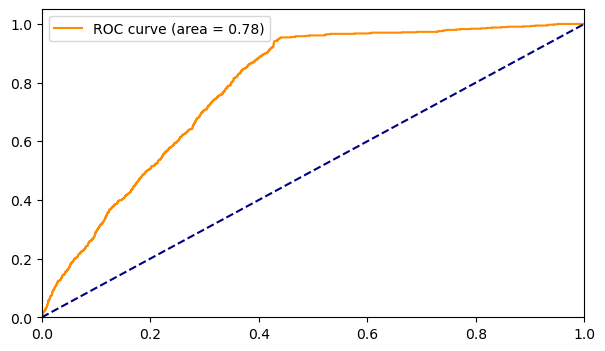

In [836]:
# roc and auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob_train["Prob_1"])
auc=metrics.roc_auc_score(y_train, prob_train["Prob_1"])

plt.figure(figsize=(7,4))
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()